In [ ]:
New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. 
But their main product of exporting since early 1980s has been Wheat. They export wheat 
to countries like America, Afghanistan, Australia etc. 
They started seeing varying exports of sales year on year for various countries. 

The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc.
Now they need to decide which countries fall in the same range of export and which don’t. 

They also need to know which countries export is low and can be improved and which countries are 
performing very well across the years.

The data provided right now is across 18 years. 
What they need is a repeatable solution which won’t get affected no matter how much data is added across time 
and that they should be able to explain the data across years in less number of variables.


Objective: Our objective is to cluster the countries based on various sales data provided to us across years. 
    We have to apply an unsupervised learning technique like K means or Hierarchical clustering so 
    as to get the final solution. But before that we have to bring the exports (in tons) of all countries down 
    to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to 
    get the principal components which explain max variance.


Implementation:
1) Read the data file and check for any missing values
2) Change the headers to country and year accordingly.
3) Cleanse the data if required and remove null or blank values
4) After the EDA part is done, try to think which algorithm should be applied here.
5) As we need to make this across years we need to apply PCA first.
6) Apply PCA on the dataset and find the number of principal components which explain
nearly all the variance.
7) Plot elbow chart or scree plot to find out optimal number of clusters.
8) Then try to apply K means, Hierarchical clustering and showcase the results.
9) You can either choose to group the countries based on years of data or using the
principal components.
10) Then see which countries are consistent and which are largest importers of the good
based on scale and position of cluster.
    

In [19]:
#1) Read the data file and check for any missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_15_Certification_Project_Python_Certification_Training/Project_Data_1.csv'

df=pd.read_csv(data,index_col = 0,thousands  = ',')

df.head(7)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34


In [2]:
df.shape

(207, 18)

In [4]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find missing na values
print('Missing values:\n{}'.format(df.isna().sum()))


# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
#print('\nUnique values of "Type": {}'.format(df['Sales of Wheat in tons'].unique()))

Missing values:
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64
Missing values:
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

Number of duplicated records: 1


In [5]:
# check null, nan values
df.isna()

# drop nan values if exists
df.dropna()


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35


In [6]:
df.shape

(207, 18)

In [7]:
#2) Change the headers to country and year accordingly.

df.index.names = ['country']
df.columns.names = ['year']
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [ ]:
#3) Cleanse the data if required and remove null or blank values

In [8]:
df.replace('', np.nan, inplace=True)

In [9]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find missing na values
print('Missing values:\n{}'.format(df.isna().sum()))



Missing values:
year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64
Missing values:
year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64


In [ ]:
#conclusion: There are no missing or NAN values in df

In [ ]:
#4) After the EDA part is done, try to think which algorithm should be applied here.



In [10]:
df.head(2)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22


In [11]:
#5) As we need to make this across years we need to apply PCA first.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
existing_2d = pca.transform(df)

In [15]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [16]:
print(pca.explained_variance_ratio_)

[0.91808789 0.060556  ]


In [17]:
print(pca.components_)

[[ 0.25583801  0.25470394  0.25141064  0.24772801  0.24449817  0.24141272
   0.2202353   0.21919471  0.2165391   0.22204506  0.22879832  0.23376061
   0.23077592  0.23574534  0.23472456  0.23435384  0.23355341  0.23217055]
 [ 0.33830021  0.31393233  0.29277268  0.26949215  0.23778166  0.20993393
   0.1208106   0.07301764  0.01743088 -0.05608852 -0.10059987 -0.16723358
  -0.20135595 -0.26801844 -0.27958111 -0.29766788 -0.29587202 -0.31605565]]


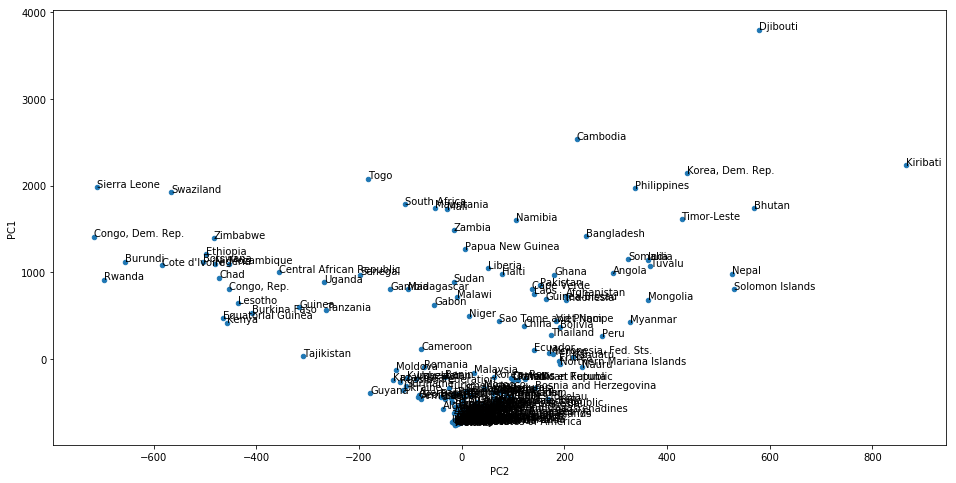

In [18]:
#6) Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.

#In our case PC1 explain 92% variance and PC2 explains remaining 6% variance

%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(df.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

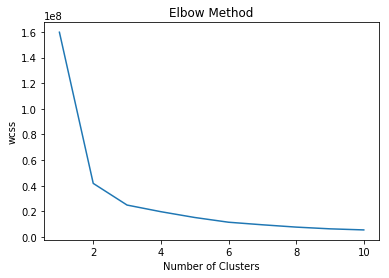

In [20]:
#7) Plot elbow chart or scree plot to find out optimal number of clusters.

# elbow method to find number of clusers
wcss = []  # wcss - within cluster squared sum of inertia

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=10)
    kmeans.fit(existing_df_2d)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()
# It indicates the number of clusters will be 3


In [ ]:
# It indicates the number of clusters will be 3

In [21]:
#8) Then try to apply K means, Hierarchical clustering and showcase the results.


# Kmeans Algorithm
kmeans = KMeans(n_clusters=3)
# fir the model
kmeans.fit(existing_df_2d)
# clusters centers
print(kmeans.cluster_centers_)


[[-515.89907824   13.52152289]
 [ 818.40566987  -80.66376278]
 [1988.84290863  132.91583826]]


In [22]:
# adding cluster column
existing_df_2d["cluster"] = kmeans.labels_
existing_df_2d.head()


,PC1,PC2,cluster
country,,,
Afghanistan,732.215864,203.381494,1
Albania,-613.296510,4.715978,0
Algeria,-569.303713,-36.837051,0
American Samoa,-717.082766,5.464696,0
Andorra,-661.802241,11.037736,0


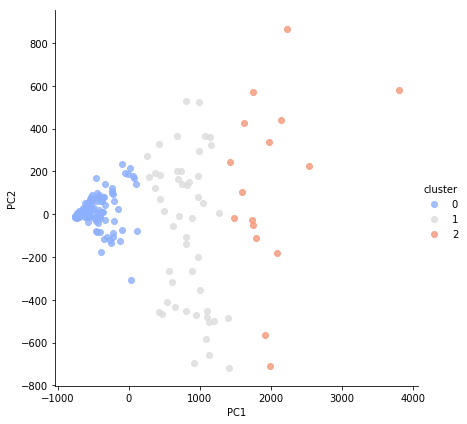

In [24]:
# plotting the cluster data
sns.lmplot('PC1', 'PC2', data=existing_df_2d, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)


In [25]:
#9) You can either choose to group the countries based on years of data or using the principal components.
#10) Then see which countries are consistent and which are largest importers of the good based on scale and position 
#of cluster.


# adding cluster column to original data
df["cluster"] = kmeans.labels_




In [27]:
# export data for analysing
existing_df_2d.sort_values(["cluster", "PC1", "PC2"])
existing_df_2d.to_csv("output.csv", index=True)


In [34]:
existing_df_2d.sort_values(["cluster", "PC1", "PC2"],ascending=True)

,PC1,PC2,cluster
country,,,
Monaco,-759.525361,-13.312820,0
Iceland,-756.172711,-12.528394,0
Sweden,-750.538270,-13.357630,0
United States of America,-749.043141,-9.326693,0
Canada,-748.125458,-11.062861,0
Barbados,-747.393482,-9.335381,0
Norway,-745.515028,-10.035931,0
Australia,-742.575408,-13.748824,0
San Marino,-742.009194,-10.407468,0


In [28]:
# Largest Importer and constantly increasing
df.loc["Sierra Leone"]
X = df.loc["Sierra Leone"].index[0:18]
Y = df.loc["Sierra Leone"].values[0:18]


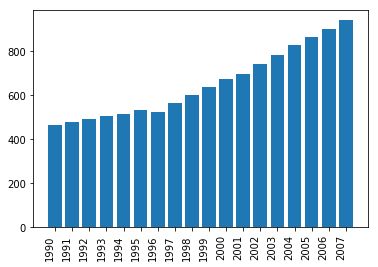

In [29]:
plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.show()


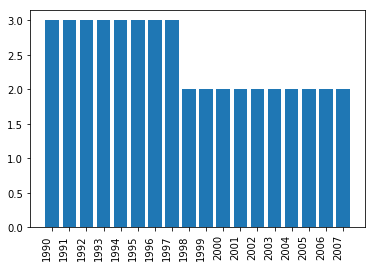

In [30]:
# most consistent
df.loc["Monaco"]
X = df.loc["Monaco"].index[0:18]
Y = df.loc["Monaco"].values[0:18]

plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.show()